# Pandas中的绘图函数
之前看的直接用matplotlib来绘图，画一张图还得配置各种标题，刻度标签等等。而pandas的DataFrame和Series都自带生成各类图表的plot方法，就可以省略去写行列标签，分组信息等。明显更简洁的多。

## 线形图
plot方法默认生成的就是线形图。

### Series

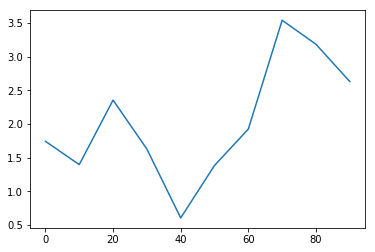

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame 
%matplotlib inline  

s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10)) 
s.plot()
plt.show()

该Series对象的索引会传给matplotlib，并用来绘制X轴。可以用`use_index=False`,然后用xticks和xlim，yticks和ylim调节。其他参数参考后面的plot的参数表查看。

### DataFrame

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例。

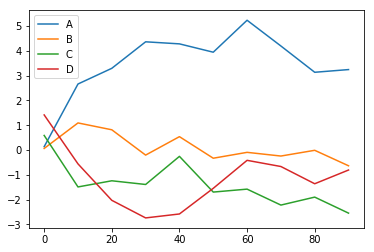

In [2]:
df = DataFrame(np.random.randn(10,4).cumsum(0),columns = ['A','B','C','D' ],index = np.arange(0,100,10)) 
df.plot()
plt.show()

Series.plot方法的参数如下：

<table><thead><tr class="firstRow"><th>参数</th><th>说明</th></tr></thead><tbody><tr><td>label</td><td>用于图例的标签</td></tr><tr><td>ax</td><td>要在其上进行绘制的matplotlib subplot对象.如果没有设置，则使用当前matplotlib subplot</td></tr><tr><td>style</td><td>将要传给matplotlib的风格字符串(如'ko--')</td></tr><tr><td>alpha</td><td>图表的填充不透明度(0到1之间)</td></tr><tr><td>kind</td><td>可以是'line', 'bar', 'barh', 'kde</td></tr><tr><td>logy</td><td>在y轴上使用对数标尺</td></tr><tr><td>use index</td><td>将对象的索引用作刻度标签</td></tr><tr><td>rot</td><td>旋转刻度标签(0到360)</td></tr><tr><td>xticks</td><td>用作x轴刻度的值</td></tr><tr><td>yticks</td><td>用作y轴刻度的值</td></tr><tr><td>xlim</td><td>x轴的界限(例如[0,101)</td></tr><tr><td>ylim</td><td>y轴的界限</td></tr><tr><td>grid</td><td>显示轴网格线(默认打开)</td></tr></tbody></table>

专用于DataFrame.plot方法的参数如下：

<table><thead><tr class="firstRow"><th>参数</th><th>说明</th></tr></thead><tbody><tr><td>subplots</td><td>将各个DataFrame列绘制到单独的subplot中</td></tr><tr><td>sharex</td><td>如果subplots=True，则共用同一个x轴，包括刻度和界限</td></tr><tr><td>sharey</td><td>如果subplots=True，则共用同一个Y轴</td></tr><tr><td>figsize</td><td>表示图像大小的元组</td></tr><tr><td>title</td><td>表示图像标题的字符串</td></tr><tr><td>legend</td><td>添加一个subplot图例(默认为True)</td></tr><tr><td>sort_columns</td><td>以字母表顺序绘制各列，默认使用当前列顺序</td></tr></tbody></table>

## 柱状图
柱状图比较简单，在线形图生成的代码下，添加`kind='bar'`(垂直柱状图)或`kind='barh'`(水平柱状图)。

DataFrame默认会将每行的数据分为一组。

In [3]:
df = DataFrame(np.random.randn(10,4).cumsum(0),columns = ['A','B','C','D' ],index = np.arange(0,100,10)) 
df

,A,B,C,D
0,-0.145319,0.712597,1.161129,-2.292741
10,-0.583992,-0.840122,1.481824,-0.962701
20,1.004176,-2.004825,0.780270,-1.216307
30,1.847314,-0.991081,-0.231318,0.477766
40,1.269040,0.155861,-0.722653,-1.004303
50,1.328874,-0.509976,-0.060881,-0.201945
60,2.200966,-0.371168,-0.328213,-0.420436
70,2.372057,0.024095,1.353490,-0.374818
80,0.593218,-2.667294,0.549109,-0.071938
90,1.031836,-4.453591,1.340863,-1.408318


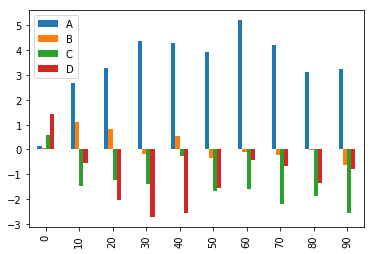

In [3]:
df.plot(kind = 'bar')
plt.show()

当使用`stacked = True`参数时即可生成堆积柱状图，每行的值堆积在一起。

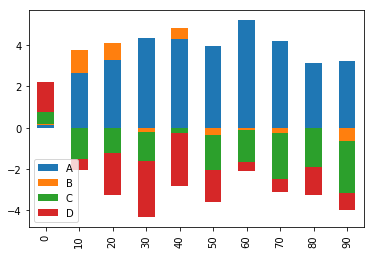

In [4]:
df.plot(kind = 'bar',stacked = True)
plt.show()

## 直方图和密度图
直方图(histogram)是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中.绘制的是各面元中数据点的数量。简而言之，就是用来表明分布情况的柱状图。一般第一步是将值的范围分段，即将整个值的范围分成一系列间隔，然后计算每个间隔中有多少值。 这些值通常被指定为连续的，不重叠的变量间隔。 间隔必须相邻，并且通常是（但不是必须的）相等的大小。Serises的hist方法可以实现。

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核(即诸如正态(高斯)分布之类的较为简单的分布)。因此，密度图也被称作KDE (Kernel Density Estimate,核密度估计)图.调用plot时加`kind='kde’`即可生成一张密度图（标准混合正态分布）。

这两种图表常常会被画在一起。直方图以规格化形式给出(以便给出面元化密度).然后再在其上绘制核密度估计。看一个由两个不同的标准正态分布组成的双峰分布(如图所示):

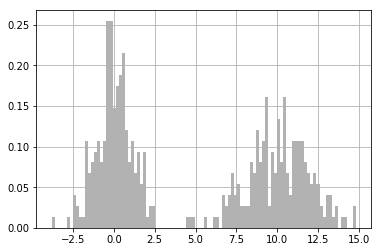

In [5]:
comp1 = np.random.normal(0,1,size=200) #N(0,1)
comp2 = np.random.normal(10,2,size=200) #N(10,4)
values = Series(np.concatenate([comp1,comp2])) 

values.hist(bins=100,alpha=0.3,color='k',density =True) #hist画直方图values.plot(kind='kde',style='k--')
plt.show()

两个不同的标准正态分布组成的双峰分布。

## 散布图

散布图(scatter plot)是观察两个一维数据序列之间的关系的有效手段。matplotlib的`scatter`方法是绘制散布图的主要方法。
DataFrame用`plotting`的`scatter_matrix`创建散布图矩阵，并且支持对角线上放置各变量的直方图或密度图(`diagonal='kde'`)。

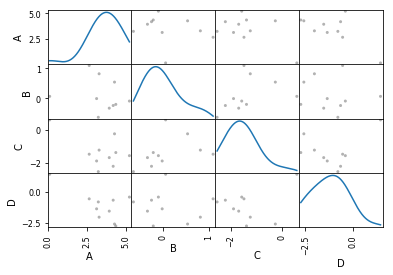

In [6]:
import pandas as pd 

pd.plotting.scatter_matrix(df,diagonal='kde',color='k',alpha=0.3)
plt.show()

## Python图形化工具生态系统
matplotlib是Python领域使用最广泛的绘图工具。虽然matplotlib可以为
Web应用创建漂亮的图表，但这通常需要耗费大量的精力，因为它原本是为印刷而设计的。先不管美不美观，至少它足以应付大部分需求.其他的还有Chaco（非常适合用复杂的图形化方式表达数据的内部关系。对交互的支持要好得多，而且渲染速度很快），mayavi（是一个基于开源C++图形库VTK的3D图形工具包。也能集成到Ipython实现交互）

最后，关于图形化工具的原话：基于Web技术(比如JavaScript)的图形化是必然的发展趋势。毫无疑问.许多基于Flash或JavaScript的静态或交互式图形化工具已经出现了很多年。而且类似的新工具包(如d3.js及其分支项目)一直都在不断涌现。相比之下，非Web式的图形化开发工作在近几年中减慢了许多。Python以及其他数据分析和统计计算环挽(如R)都是如此。于是，开发方向就变成了实现数据分析和准备工具（如pandas）与Web浏览器之间更为紧密的集成.